In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///sqlite/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(conn, reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=conn)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mos_rec = session.query(Measurement.date)\
    .order_by(Measurement.date.desc()).first()[0]
print(mos_rec)

2017-08-23


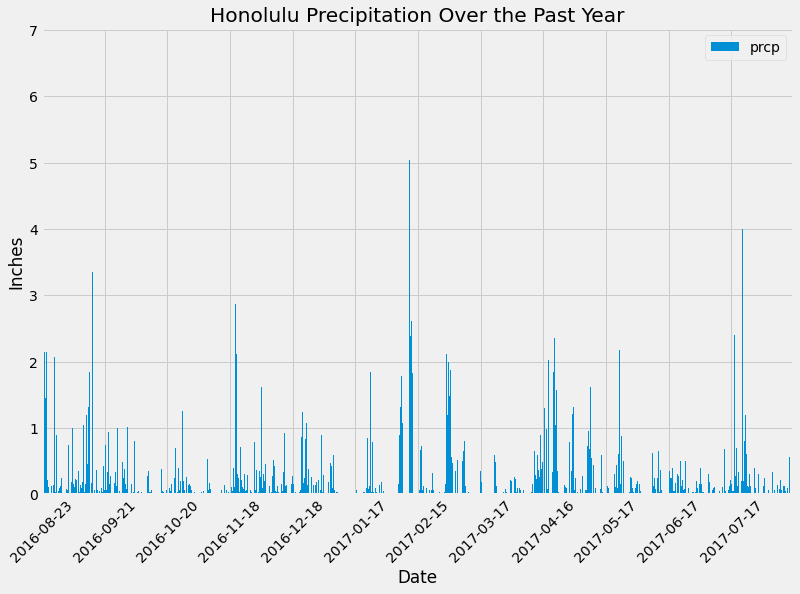

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_earlier = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_earlier)

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain, columns = ['date','prcp'])
rain_df.head()

# Sort the dataframe by date
rain_df = rain_df.sort_values("date")
rain_df

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot.bar(x='date', y='prcp',
    rot=45,
    grid=True,
    title="Honolulu Precipitation Over the Past Year",
    xlabel="Date",
    ylabel="Inches",
    legend=True,
    align="center",
    figsize=(12,8),
    width=1.6
)
plt.locator_params(nbins=12)
plt.show()



In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
count_ = func.count(Measurement.station)
session.query(Measurement.station, count_).group_by(Measurement.station).order_by(count_.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count(Measurement.station)
session.query(Measurement.station, count_).group_by(Measurement.station).order_by(count_.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:


# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_count = func.max(Measurement.tobs)
min_count = func.min(Measurement.tobs)
avg_count = func.avg(Measurement.tobs)

Max, Min, Avg = session.query(max_count, min_count, avg_count ).\
    filter(Measurement.station == 'USC00519281').first()

print(f'The Honolulu max temperature is {Max}, while the minimum temperature is {Min}. The avg temperature for station USC00519281 is {Avg}.')
Max
Min
Avg

The max temperature is 85.0, the minimum temperature is 54.0 and the avg temperature for station USC00519281 is 71.66378066378067.


71.66378066378067

In [29]:
# Using the most active station id
max_count = func.max(Measurement.date)
most_recent_date = session.query(Measurement.date, max_count).\
    filter_by(station = 'USC00519281').first()
last_year = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year)

#display query results into a dataframe
temp_df = pd.DataFrame(temp, columns = ['date','Tobs'])
temp_df.head()


,date,Tobs
0,2016-08-18,80.0
1,2016-08-19,77.0
2,2016-08-20,80.0
3,2016-08-21,76.0
4,2016-08-22,77.0


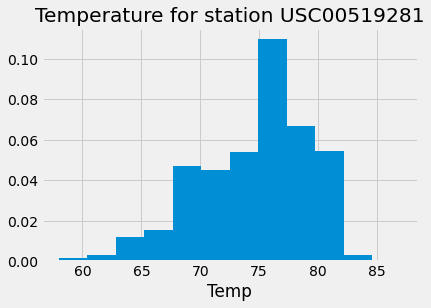

In [30]:
#plot the temps data into a histogram
plt.hist(temp_df["Tobs"], density = True, bins = 12)
plt.title("Temperature for station USC00519281")
plt.xlabel("Temp")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()